# Decision Tree

           It is a tree-based supervised learning algorithms.It is mostly used for classification problem. It works for both
categorical or continous input.

# Reading the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("daily_weather.csv")
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [3]:
df.shape

(1095, 11)

In [4]:
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int64
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null int64
dtypes: float64(9), int64(2)
memory usage: 94.2 KB


In [6]:
df[df.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,1
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,1
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,1
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,0
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,1


In [7]:
#Data Cleaning
del df['number']
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [8]:
df=df.dropna()             #All row with NaN will be dropped out of df
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [9]:
df.shape

(1064, 10)

# Loading the library

In [10]:
from sklearn.metrics import accuracy_score,auc
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

# Building the Model

In [11]:
dep="relative_humidity_3pm"
ind=df.columns.tolist()
ind.remove(dep)

In [12]:
x=df[ind]
y=df[dep]

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=324)

In [14]:
model=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Predicting the Value

In [15]:
pred=model.predict(xtest)

In [16]:
accuracy_score(pred,ytest)

0.9005681818181818

# Decision Tree HyperParameter

In [17]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [18]:
xtrain.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,918.913897,65.194366,142.123330,5.568288,147.789373,7.089629,0.202399,282.884615,34.041941
std,3.147923,11.210412,68.773699,4.467828,67.186609,5.486311,1.628988,1584.404987,25.479034
min,907.990000,36.752000,15.500000,0.782929,31.800000,1.185578,0.000000,0.000000,6.090000
25%,916.727792,57.375500,65.282862,2.304048,75.978656,3.168182,0.000000,0.000000,15.356207
50%,919.000000,65.967556,166.225018,3.958486,176.800000,5.077854,0.000000,0.000000,23.169630
75%,921.134993,73.908500,190.500000,7.504934,201.400000,9.104346,0.000000,0.000000,44.430128
max,929.320000,91.112000,343.400000,21.541732,299.200000,26.351153,24.020000,17704.000000,92.410000


max_depth       :  depth of the tree,tells how deep tree is
max_features    :  how many feature will it take to calculate GINI
max_leaf_nodes  :  number of terminal nodes
min_samples_leaf:  minimum number of sample in leaf node

In [19]:
model=DecisionTreeClassifier(max_leaf_nodes=10,min_impurity_decrease=0.0004,random_state=0,
                             max_depth=5,min_samples_leaf=10)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0004, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

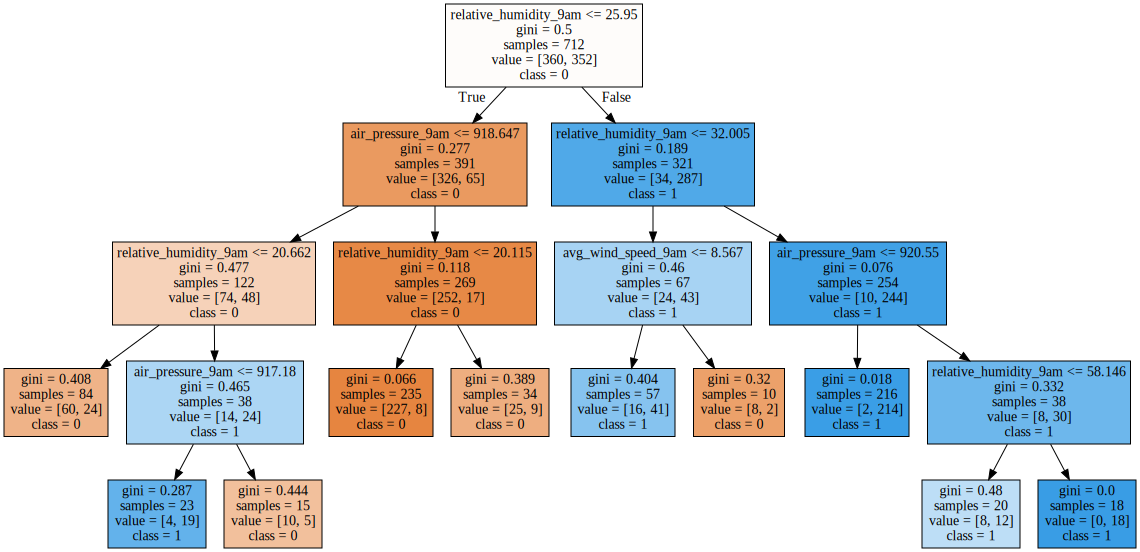

In [20]:
graph=Source(tree.export_graphviz(model,out_file=None,
                                 feature_names=xtrain.columns,class_names=['0','1'],
                                 filled=True))
display(SVG(graph.pipe(format="svg")))

In [21]:
pred=model.predict(xtest)
accuracy_score(pred,ytest)

0.9005681818181818

# Disadvantage of  Decision Tree
1.Overfitting problem


# Advantage
1.   Easy to Understand

2.   Useful for DataExploration

3.   Non Parametric Method